In [13]:
import graphviz

In [14]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [15]:
class Node:
    def __init__(self, id):
        self.id = id
        self.arcs = []
        self.attributes = dict()
        self.SetColor('black')
        self.SetStyle('solid')
        self.SetShape('circle')
        
    def SetColor(self, color):
        self.attributes['color'] = color
        
    def SetStyle(self, style):
        self.attributes['style'] = style
        
    def SetShape(self, shape):
        self.attributes['shape'] = shape
        
    def SetAttribute(attr, value):
        self.attributes[attr] = value

In [16]:
class Arc:
    def __init__(self, from_, to_, attributes = None):
        self.beginning = from_
        self.end = to_
        if attributes is None:
            self.attributes = dict()
            self.attributes['color'] = 'black'
            self.attributes['style'] = 'solid'
        else:
            self.attributes = attributes
    
    def SetColor(color):
        self.attributes['color'] = color
        
    def SetStyle(style):
        self.attributes['style'] = style
        
    def SetAttribute(attr, value):
        self.attributes[attr] = value

In [17]:
class Graph:
    def __init__(self, arcs=None):
        self.nodes = dict()
        if arcs is not None:
            for arc in arcs:
                if arc.beginning not in self.nodes:
                    self.nodes[arc.beginning] = Node(arc.beginning)
                if arc.end not in self.nodes:
                    self.nodes[arc.end] = Node(arc.end)
                self.AddArc(arc.beginning, arc.end, arc.attributes)                
    
    def AddNode(self):
        num_nodes = len(self.nodes)
        self.nodes.append(Node(num_nodes))
        
    def AddArc(self, from_, to_, attributes=None):
        arc = Arc(from_, to_, attributes)        
        self.nodes[from_].arcs.append(Arc(from_, to_))
        
    def Visualize(self):
        graph_repr = graphviz.Digraph(graph_attr={"rankdir" : "LR"}, edge_attr={'arrowhead':'vee'})
        attrs = {}
        for id_, node in self.nodes.items():
            graph_repr.node(str(id_), str(id_), 
                            color=node.attributes['color'], 
                            style=node.attributes['style'],
                            shape=node.attributes['shape'])
        for id_, node in self.nodes.items():
            for arc in node.arcs:
                graph_repr.edge(str(node.id), 
                                str(arc.end),
                                color=arc.attributes['color'],
                                style=arc.attributes['style'])
        return graph_repr
        

In [26]:
arcs = [
    Arc(0, 1),
    Arc(1, 2),
    Arc(1, 3),
    Arc(2, 4),
    Arc(1, 4),
    Arc(3, 4)
]

In [36]:
graph = Graph(arcs)

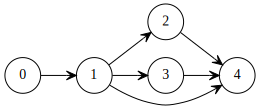

In [37]:
graph.Visualize()

In [38]:
def dfs(graph, node_id, visited, outlist):
    visited.add(node_id)
    graph.nodes[node_id].attributes['color'] = 'green'
    outlist.append(graph.Visualize())
    for arc in graph.nodes[node_id].arcs:
        if arc.end not in visited:
            arc.attributes['style'] = 'dashed'
            arc.attributes['color'] = 'green'
            dfs(graph, arc.end, visited, outlist) 
            arc.attributes['style'] = 'solid'
            arc.attributes['color'] = 'red'
        else:
            arc.attributes['color'] = 'blue'
        outlist.append(graph.Visualize())
            
    graph.nodes[node_id].attributes['color'] = 'red'

In [39]:
visited = set()
outlist = []
outlist.append(graph.Visualize())
dfs(graph, 0, visited, outlist)
outlist.append(graph.Visualize())

In [40]:
def step_slice(idx):
    return outlist[idx]

interact(step_slice, idx=widgets.IntSlider(min=0, max=len(outlist)-1, step=1, value=0));

interactive(children=(IntSlider(value=0, description='idx', max=12), Output()), _dom_classes=('widget-interact…